In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
url = "path_to_dataset.csv"
df = pd.read_csv(url)

(df.head())
(df.info())
(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [33]:
X = df[['temp', 'hum', 'windspeed(mph)']]
y = df['cnt']
X
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(          temp      hum  windspeed(mph)
 682  14.076653  66.2917       22.917082
 250  25.990433  93.9565       12.914116
 336  12.265847  61.2917        6.417481
 260  20.807500  69.5000       11.958361
 543  28.597500  36.0000       18.208925
 ..         ...      ...             ...
 71   15.758268  52.7391       18.130468
 106  18.723347  47.9583       20.334232
 270  26.035000  84.8750        9.958143
 435  14.831299  47.6957       14.913329
 102  16.912500  81.9167       16.791339
 
 [584 rows x 3 columns],
           temp      hum  windspeed(mph)
 703  19.509153  73.3750       11.666643
 33    7.665237  43.7826       18.609384
 300  13.564153  58.5833       15.375093
 456  17.459153  67.6250       11.541889
 633  22.550000  57.0000       15.833507
 ..         ...      ...             ...
 70   13.495847  59.4583       14.791925
 192  32.560847  55.9167       13.417018
 328  15.375000  64.3750        6.626019
 165  25.693347  47.1667       11.250104
 135  23.677500  78.7917      

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
(f"Mean Squared Error: {mse}")

'Mean Squared Error: 2020722.2320442533'

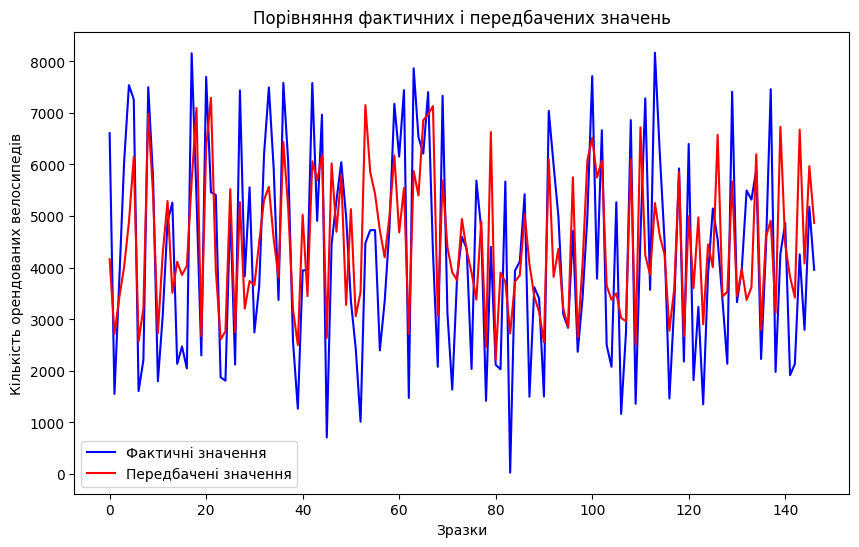

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Фактичні значення', color='blue')
plt.plot(y_pred, label='Передбачені значення', color='red')
plt.legend()
plt.xlabel('Зразки')
plt.ylabel('Кількість орендованих велосипедів')
plt.title('Порівняння фактичних і передбачених значень')
plt.show()